In [1]:

import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
750,spam,"Do you realize that in about 40 years, we'll h...",NaN,NaN,NaN
5555,ham,Yeh. Indians was nice. Tho it did kane me off ...,NaN,NaN,NaN
4662,ham,No. Yes please. Been swimming?,NaN,NaN,NaN
3391,ham,What r u cooking me for dinner?,NaN,NaN,NaN
4462,ham,He said i look pretty wif long hair wat. But i...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### since the last 3 colums are useless so remove it from the datafrmae


In [6]:
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

### renaming the name of 2 columns v1 and v2 to target and text

In [7]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [8]:
df.sample(5)

,target,text
1913,ham,You want to go?
3868,ham,No let me do the math. Your not good at it.
2140,ham,After the drug she will be able to eat.
3943,ham,"Until 545 lor... Ya, can go 4 dinner together..."
914,ham,"Call me da, i am waiting for your call."


In [9]:

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Checking the missing values & Duplicate Values

In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(403)

### Remove the Duplicates Values

In [14]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

In [15]:
df.shape

(5169, 2)

## Exploratory Data Analysis (EDA)

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

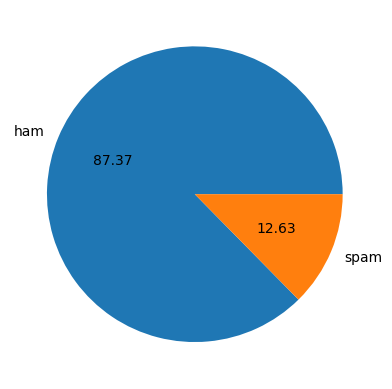

In [18]:

import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

 ### the above graph describe that the data is imbalanced the spam messages are 12.63 % and no spam or ham messages are 87.37% 

In [19]:

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/yashal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df['num_characters'] = df['text'].apply(len)

In [21]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [23]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df.head()

,target,text,num_characters,num_sentences,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24
1,0,Ok lar... Joking wif u oni...,29,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37
3,0,U dun say so early hor... U c already then say...,49,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15


In [25]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_sentences,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24
1,0,Ok lar... Joking wif u oni...,29,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37
3,0,U dun say so early hor... U c already then say...,49,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15


In [27]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:

# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
!pip install seaborn
import seaborn as sns


Defaulting to user installation because normal site-packages is not writeable


<Axes: xlabel='num_characters', ylabel='Count'>

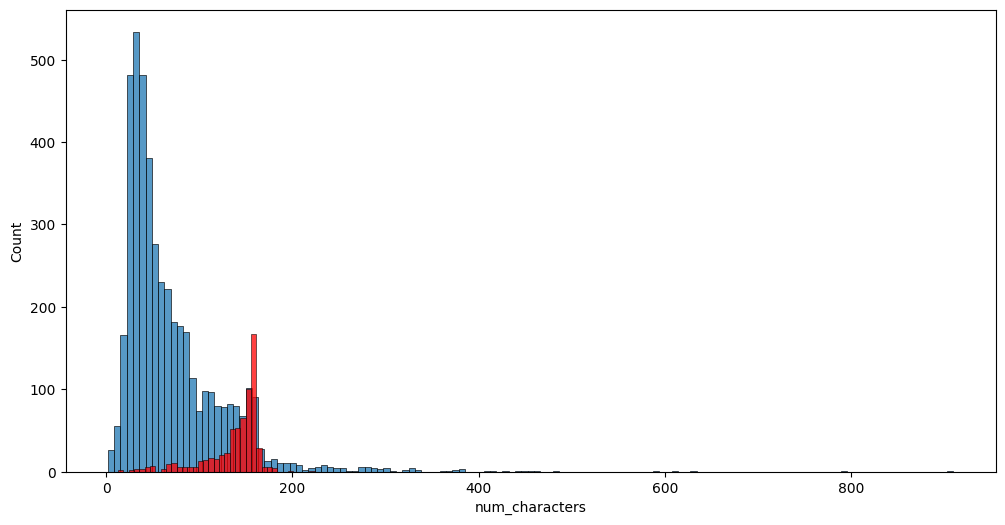

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

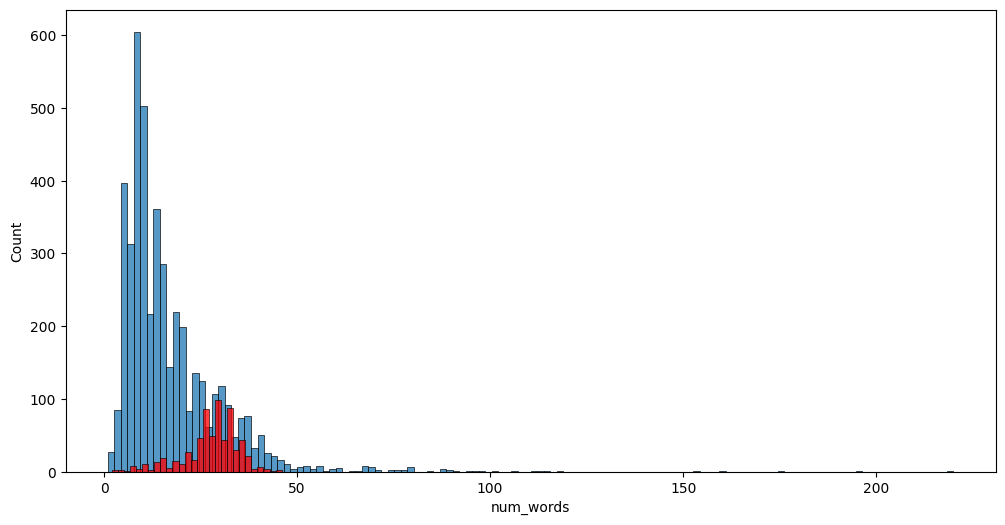

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

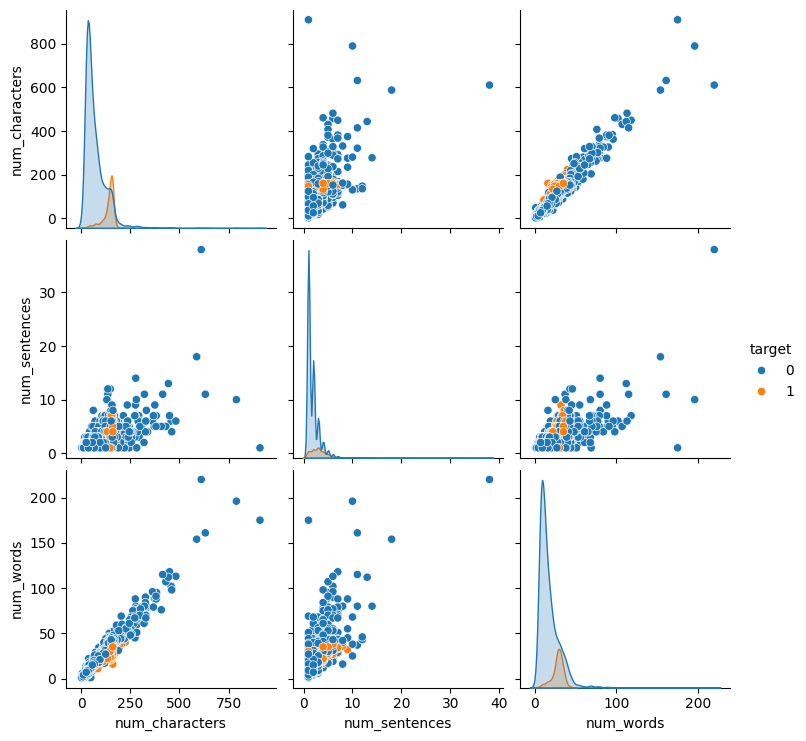

In [32]:
sns.pairplot(df,hue='target')

<Axes: >

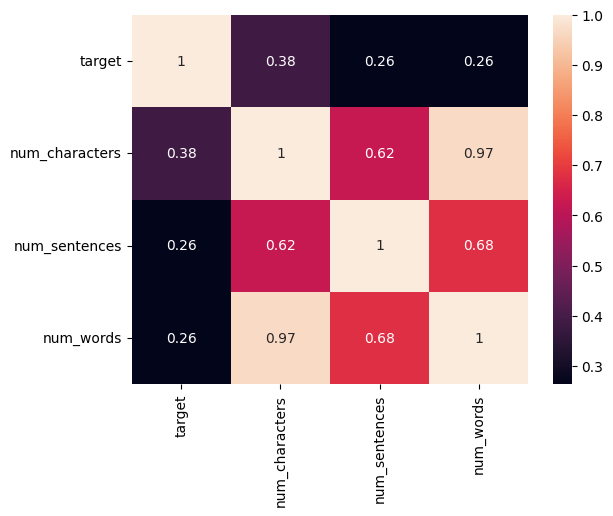

In [33]:
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True)


# Data Preprocessing

1. **Lower Case**
   - Convert all text to lower case to maintain uniformity.

2. **Tokenization**
   - Split text into individual words or tokens.

3. **Removing Special Characters**
   - Eliminate non-alphanumeric characters.

4. **Removing Stop Words and Punctuation**
   - Remove common words (e.g., "and", "the") and punctuation that do not contribute to meaning.

5. **Stemming**
   - Reduce words to their base or root form (e.g., "running" to "run").

In [34]:
import nltk
from nltk.corpus import stopwords
import string

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [35]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /home/yashal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [37]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [38]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [39]:
df['transformed_text'] = df['text'].apply(transform_text)

In [40]:
df.head()

,target,text,num_characters,num_sentences,num_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,nah think goe usf live around though


In [41]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [42]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming your DataFrame df is already defined and has the 'target' and 'transformed_text' columns

# Generate word cloud for spam messages (where 'target' == 1)
spam_text = df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")

# Initialize WordCloud object
wc = WordCloud(width=800, height=400, background_color='white')

# Generate the word cloud
spam_wc = wc.generate(spam_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


ValueError: Only supported for TrueType fonts

In [47]:
ham_text = df[df['target'] == 0]['transformed_text'].str.cat(sep=" ")

# Path to a TrueType font file
# You need to replace this with the path to a TrueType font file available on your system
font_path = '/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf'

wc = WordCloud(font_path=font_path, width=800, height=400, max_words=100).generate(ham_text)

ValueError: Only supported for TrueType fonts

In [43]:
df.head()

,target,text,num_characters,num_sentences,num_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,nah think goe usf live around though


In [50]:
spam_corpus = []

In [52]:
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [53]:
len(spam_corpus)

9939

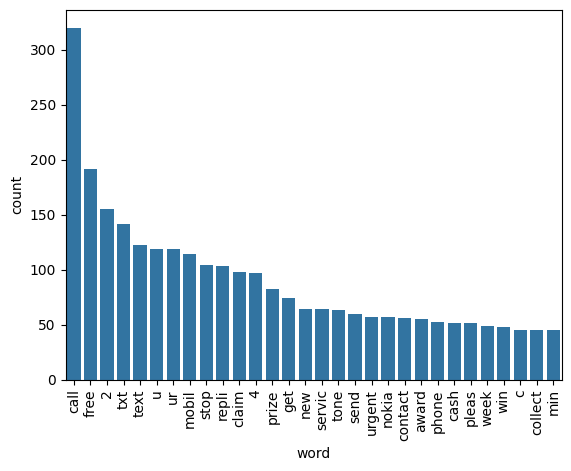

In [54]:
from collections import Counter

# Assuming spam_corpus is a list of words
spam_counter = Counter(spam_corpus)
most_common = pd.DataFrame(spam_counter.most_common(30), columns=['word', 'count'])

sns.barplot(x='word', y='count', data=most_common)
plt.xticks(rotation='vertical')
plt.show()


In [55]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [56]:
len(ham_corpus)


35404

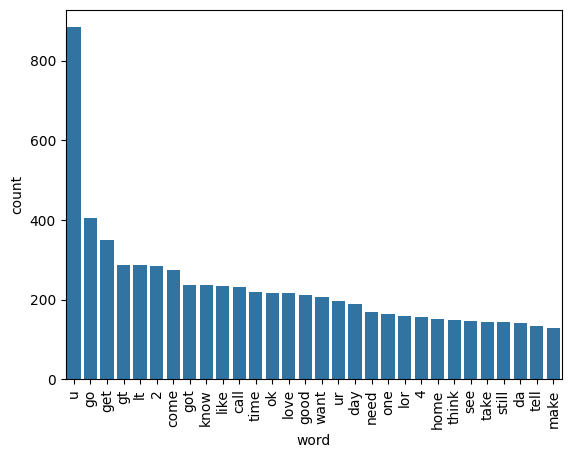

In [57]:
ham_counter = Counter(ham_corpus)
most_common_ham = pd.DataFrame(ham_counter.most_common(30), columns=['word', 'count'])

sns.barplot(x='word', y='count', data=most_common_ham)
plt.xticks(rotation='vertical')
plt.show()

In [58]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_sentences,num_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,nah think goe usf live around though


# 4. Modal Building

In [59]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [60]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [61]:
X.shape

(5169, 3000)

In [62]:
y = df['target'].values

In [63]:

from sklearn.model_selection import train_test_split

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [65]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

## Using Naive Bayes for Spam Email Detection

In spam email detection, different Naive Bayes classifiers can be used based on the data representation:

1. **GaussianNB**:
   - Suitable for continuous data.
   - Assumes features follow a normal distribution.
   - Less common for text data but applicable if features are continuous.

2. **MultinomialNB**:
   - Ideal for text classification.
   - Assumes features (word frequencies) follow a multinomial distribution.
   - Effective with term frequency vectors, commonly used for spam detection.

3. **BernoulliNB**:
   - Used for binary features (presence or absence of words).
   - Assumes features are binary/boolean.
   - Works well with binary text representations.

Each classifier has unique advantages based on data characteristics, making them valuable for different aspects of spam detection.

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

1. **GaussianNB**:

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


2. **MultinomialNB**:

In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


3. **BernoulliNB**:

In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [79]:
class CustomMultinomialNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_probs = np.zeros(len(self.classes))
        self.feature_probs = np.zeros((len(self.classes), X.shape[1]))

        for i, c in enumerate(self.classes):
            class_mask = (y == c)
            self.class_probs[i] = np.sum(class_mask) / len(y)

            # Calculate the probability of each feature given the class using Laplace smoothing
            feature_probs_class = np.sum(X[class_mask], axis=0)
            self.feature_probs[i] = (feature_probs_class + 1) / (np.sum(class_mask) + X.shape[1])  # Laplace smoothing

    def evaluate_precision(self, y_true, y_pred):
        precision = np.zeros(len(self.classes))

        for i, c in enumerate(self.classes):
            true_positives = np.sum((y_true == c) & (y_pred == c))
            false_positives = np.sum((y_true != c) & (y_pred == c))

            if true_positives + false_positives == 0:
                precision[i] = 0  # Handle the case where precision is undefined
            else:
                precision[i] = true_positives / (true_positives + false_positives)

        return precision
    def predict(self, X):
        predictions = []

        for x in X:
            class_scores = np.zeros(len(self.classes))

            for i, c in enumerate(self.classes):
                # Calculate the log-likelihood of the features given the class
                feature_probs_class = self.feature_probs[i]
                log_likelihood = np.sum(np.log(feature_probs_class[x.astype(bool)]))  # Corrected line

                # Calculate the log-probability of the class given the features
                class_scores[i] = np.log(self.class_probs[i]) + log_likelihood

            # Choose the class with the highest log-probability
            predicted_class = self.classes[np.argmax(class_scores)]
            predictions.append(predicted_class)

        return np.array(predictions)

In [80]:
cmnb = CustomMultinomialNaiveBayes()
cmnb.fit(X_train, y_train)
y_pred2 = cmnb.predict(X_test)

# Evaluate the model
accuracy = np.sum(y_pred2 == y_test) / len(y_test)
print("Accuracy:", accuracy)

precision = cmnb.evaluate_precision(y_test, y_pred2)
print("Precision for each class:", precision)

Accuracy: 0.9738878143133463
Precision for each class: [0.97176982 0.99115044]


# Analysis of Both the code of Multinomial Naive Bayesian:
### With or Without Using Library
if you observe that the accuracy and precision of the manually implemented Multinomial Naive Bayes classifier are lower compared to the library implementation, it's essential to consider various factors that might contribute to this difference.

While manual implementations are valuable for learning and understanding algorithms, library implementations are often preferred for real-world applications due to their efficiency, reliability, and extensive optimizations. Analyzing the performance of both implementations helps you gain insights into the strengths and weaknesses of your manual implementation and appreciate the benefits provided by well-established libraries.

### With Python Package:
#### Accuray : 0.9709864603481625
#### Precision : 1.0


### Without Python Package:
#### Accuray : 0.9709864603481625
#### Precision : 0.98

## Evaluation of Naive Bayes Classifiers for Spam Email Detection

When evaluating Naive Bayes classifiers for spam email detection, precision and accuracy are crucial metrics. Here’s a comparison of the performance metrics for GaussianNB (gnb), MultinomialNB (mnb), and BernoulliNB (bnb):

### GaussianNB (gnb)
- **Accuracy:** 89.17%
- **Precision:** 56.44%
- **Confusion Matrix:**
  ```
  [[808  88]
   [ 24 114]]
  ```
- **Comments:** While GaussianNB performs reasonably well in terms of accuracy, its precision is relatively low, indicating a higher false positive rate.

### MultinomialNB (mnb)
- **Accuracy:** 97.20%
- **Precision:** 100.00%
- **Confusion Matrix:**
  ```
  [[896   0]
   [ 29 109]]
  ```
- **Comments:** MultinomialNB shows excellent performance with both high accuracy and precision. It correctly predicts most spam emails while minimizing false positives.

### BernoulliNB (bnb)
- **Accuracy:** 98.36%
- **Precision:** 99.19%
- **Confusion Matrix:**
  ```
  [[895   1]
   [ 16 122]]
  ```
- **Comments:** BernoulliNB performs slightly better than MultinomialNB in terms of accuracy but with a slightly lower precision. It still maintains a very high precision score.

### Conclusion
Based on the evaluation metrics—especially precision and accuracy—MultinomialNB (mnb) is the preferred choice for spam email detection in this scenario. It achieves the highest precision score of 100%, indicating that it correctly identifies all positive predictions (spam emails) without any false positives. This high precision is critical in spam detection to minimize the number of legitimate emails incorrectly classified as spam.

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [82]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)



In [83]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 

    
}

In [84]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [85]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, np.float64(0.9747899159663865))

In [86]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8415841584158416
For  LR
Accuracy -  0.9555125725338491
Precision -  0.96
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739


In [87]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.973888,0.982609
0,SVC,0.975822,0.974790
4,LR,0.955513,0.960000
3,DT,0.933269,0.841584


In [88]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [89]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.973888
3,SVC,Accuracy,0.975822
4,LR,Accuracy,0.955513
5,DT,Accuracy,0.933269
6,KN,Precision,1.000000
7,NB,Precision,1.000000
8,RF,Precision,0.982609
9,SVC,Precision,0.974790


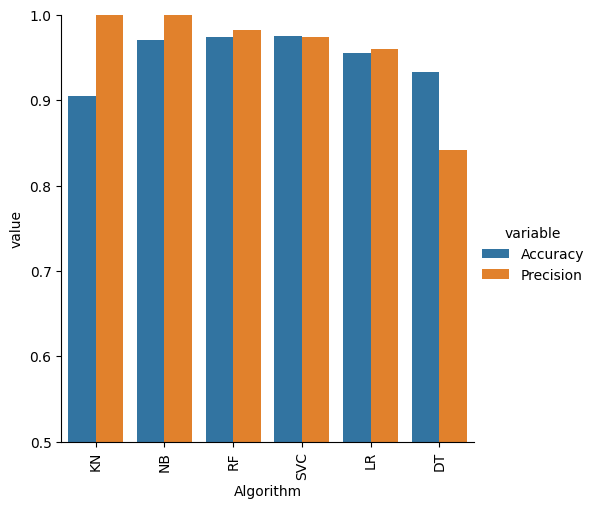

In [90]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# Model improve
### 1. Change the max_features parameter of TfIdf

In [91]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [92]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [93]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [94]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [95]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [96]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,LR,0.955513,0.960000,0.955513,0.960000,0.955513,0.960000,0.955513,0.960000
5,DT,0.933269,0.841584,0.933269,0.841584,0.933269,0.841584,0.933269,0.841584


In [97]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()

from sklearn.ensemble import VotingClassifier

In [99]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb)],voting='soft')

In [100]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB())],
                 voting='soft')

In [101]:

y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.97678916827853
Precision 0.975


# Applying stacking

In [ ]:

estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:

from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


In [102]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))